In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.824251,1.758806,0.534132,-0.291294,0.881867,0
1,0.667639,-0.688997,0.260101,-3.442216,1.305565,1
2,2.008952,2.414147,3.136993,0.989714,1.624047,0
3,-1.984662,1.813679,-3.563402,-0.883651,-1.607774,1
4,-0.791821,0.463443,1.170079,-1.017778,1.930317,0


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [6]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [7]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\hp\AppData\Local\Temp\ipykernel_11892\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [8]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\hp\AppData\Local\Temp\ipykernel_11892\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [9]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\hp\AppData\Local\Temp\ipykernel_11892\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [10]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col2', 'target'], dtype='object')
Index(['col1', 'col2', 'target'], dtype='object')
Index(['col1', 'col5', 'target'], dtype='object')


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [12]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [13]:
from sklearn.tree import plot_tree

[Text(0.4583333333333333, 0.9, 'X[1] <= -0.375\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(0.25, 0.7, 'X[0] <= 3.8\ngini = 0.159\nsamples = 23\nvalue = [2, 21]'),
 Text(0.16666666666666666, 0.5, 'X[1] <= -0.824\ngini = 0.087\nsamples = 22\nvalue = [1, 21]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.25, 0.3, 'X[1] <= -0.723\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7, 'X[0] <= -0.259\ngini = 0.417\nsamples = 27\nvalue = [19, 8]'),
 Text(0.5, 0.5, 'X[1] <= 2.182\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 

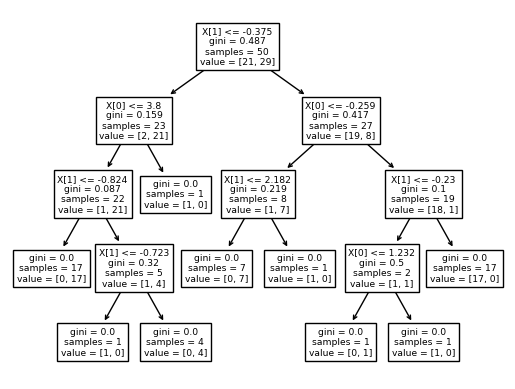

In [14]:
plot_tree(clf1)

[Text(0.6666666666666666, 0.9444444444444444, 'X[1] <= -0.354\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.5833333333333334, 0.8333333333333334, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.75, 0.8333333333333334, 'X[0] <= -0.412\ngini = 0.383\nsamples = 31\nvalue = [23, 8]'),
 Text(0.6666666666666666, 0.7222222222222222, 'X[0] <= -0.878\ngini = 0.444\nsamples = 24\nvalue = [16, 8]'),
 Text(0.5, 0.6111111111111112, 'X[0] <= -1.053\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.4166666666666667, 0.5, 'X[0] <= -1.308\ngini = 0.426\nsamples = 13\nvalue = [9, 4]'),
 Text(0.25, 0.3888888888888889, 'X[0] <= -1.797\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.16666666666666666, 0.2777777777777778, 'X[0] <= -2.048\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.08333333333333333, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.2777

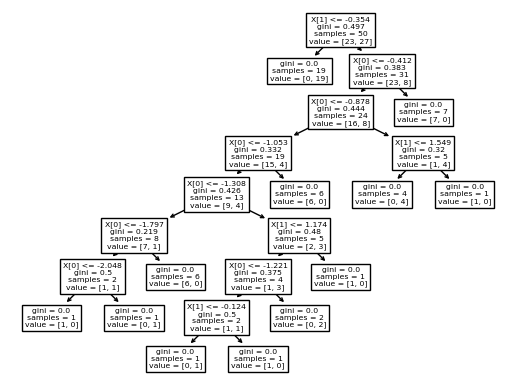

In [15]:
plot_tree(clf2)

[Text(0.5, 0.95, 'X[0] <= -2.553\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.42857142857142855, 0.85, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5714285714285714, 0.85, 'X[1] <= 2.309\ngini = 0.496\nsamples = 46\nvalue = [25, 21]'),
 Text(0.35714285714285715, 0.75, 'X[1] <= -0.379\ngini = 0.473\nsamples = 39\nvalue = [24, 15]'),
 Text(0.14285714285714285, 0.65, 'X[0] <= -1.273\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.07142857142857142, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21428571428571427, 0.55, 'X[0] <= -0.609\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.14285714285714285, 0.45, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.2857142857142857, 0.45, 'X[1] <= -1.009\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.21428571428571427, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.35714285714285715, 0.35, 'X[1] <= -0.634\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2857142857142857, 0.25, 'gini = 0

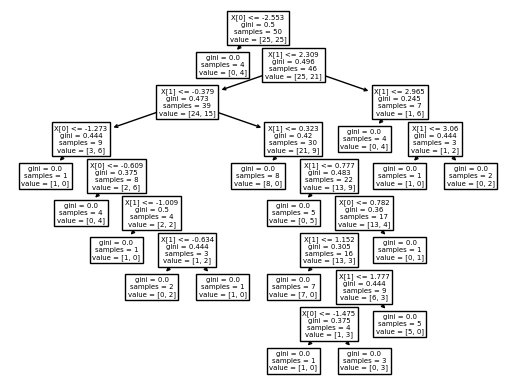

In [16]:
plot_tree(clf3)

In [17]:

clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [18]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [19]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [20]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
80,-0.856286,-1.876693,-1.147070,-1.809630,2.379063,1
78,-1.061400,0.573187,-2.897201,-0.006333,-0.519000,1
98,-1.439203,1.802914,0.689172,1.266815,-0.543800,0
79,-1.395503,0.551546,-0.192432,-0.194986,2.720813,0
54,-1.436061,-1.240315,-1.878460,-1.173625,1.483434,1
44,0.965137,-0.891707,-2.760394,1.575351,0.949083,1
41,-2.112163,1.230917,0.783146,0.005498,-0.553825,0
67,-0.813812,-1.512088,-0.573197,-1.164031,1.560987,1
96,-0.019750,-2.084265,0.216354,-0.379587,1.829625,1
64,-2.924693,-1.459841,-0.361729,-1.712602,1.147015,1
